<h1>COSIpy API testing</h1>

<h3>This notebook includes a cookbook example of analysing a simulated source with COSIpy.<br>
    The data set is composed of a background data set and a source data set, both selected with MEGAlib/mimrec in the same way:
    <ul>
        <li>Events: Only Compton</li>
        <li>Times: All</li>
        <li>Energies $E$ [keV]: 0-1000</li>
        <li>Compton Scattering angle $\phi$ [deg]: -60</li>
        <li>First lever arm $d_1$ [cm]: > 0.5</li>
        <li>Any lever arm $d_{>1}$ [cm]: > 0.3</li>
        <li>Length of Compton sequences [1]: 2-7</li>
        <li>Earth Horizon Cut: yes</li>
    </ul><br>
    The background is simulated as Ling model (Ling 1975) for a balloon altitude of 33 km during one day. A variation of the total background count rate per hour $h$ of the observation is included by hand with the function $\frac{1}{3} + \frac{2}{3} \exp\left(- \frac{1}{2} \frac{(h-9)^2}{2.75^2}\right)$ to fake altitude variations.<br>
    The sky source is a constant mono-energetic 511 keV source with a flux of $10^{-2}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$ at located at Galactic coordinates $(l/b)_{test}$.<br>
    The simulation time and orientation is taken from the 2016 flight ori file OP_160628_FullDay.ori. The MEGAlib/source files and Ling model configurations for each hour are stored in the /data/ directory.<br><br>
    The goals are:
    <ul>
        <li>Extracting a spectrum</li>
        <li>Creating a test statistic (TS) map</li>
    </ul>
    </h3>

<h3>Import COSIpy</h3>

In [1]:
from COSIpy import *
plt.style.use('thomas')

Welcome to JupyROOT 6.14/08


/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
plt.style.use('thomas')

<h3>Where to find the data</h3>

In [3]:
data_dir = 'data'
filename = 'test_dataset_9det_CE0000-1000keV_EHCstandard.tra.gz'

<h3>Init COSIpy analysis object</h3>

In [4]:
analysis = COSIpy(data_dir,filename)

<h3>Have a look what is in that object either by Python's help() function, or:</h3>

In [5]:
analysis.available_attributes

data_dir
filename
horizon
dataset


<h3>There is also the possibility to look up available methods in parent and child classes</h3>

In [6]:
analysis.dataset.available_methods

['available_attributes', 'available_methods', 'data_info', 'get_binned_data', 'init_binning', 'init_spi', 'plot_', 'plot_elevation', 'plot_lightcurve', 'plot_raw_spectrum', 'read_COSI_DataSet', 'time_binning_tags']


In [7]:
analysis.dataset.data_info

Data set not read in, use read_COSI_DataSet() first.


<h3>Read in data set from tra files</h3>

In [8]:
analysis.read_COSI_DataSet()

Switched to file /Users/thomassiegert/python/COSIpy/COSIpy/data/BG9dets_LingWithPeak_simOP_160628_FullDay_CE0000-1000keV_EHCstandard.tra.gz
Switched to file /Users/thomassiegert/python/COSIpy/COSIpy/data/SRC9det_PS511keV_l-010_b-010_simOP_160628_FullDay_CE0000-1000keV_EHCstandard.tra.gz


Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent MFile!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent MFileEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent MFileEventsTra!


In [9]:
analysis.dataset.data_info

Full filename: data/test_dataset_9det_CE0000-1000keV_EHCstandard.tra.gz
                          mean            std            min            max
      Energies:        558.364        214.768        141.397        999.997
      TimeTags: 1467111270.297      21395.897 1467072126.953 1467158298.637
    Xpointings:          0.350          1.452         -3.141          3.142
    Ypointings:         -0.119          1.301         -3.142          3.136
    Zpointings:         -0.295          1.134         -3.140          3.142
           Phi:          0.584          0.214          0.087          1.047
     Chi local:          3.079          1.816          0.000          6.277
     Psi local:          0.661          0.275          0.000          1.419
      Distance:          2.284          1.601          0.500         19.789
  Chi galactic:         -0.094          2.107         -3.142          3.142
  Psi galactic:          1.805          0.672          0.003          3.140


<h3>Access to each individual photon in the dataset is through the data dictionary:</h3>

In [10]:
analysis.dataset.data.keys()

dict_keys(['Full filename', 'Energies', 'TimeTags', 'Xpointings', 'Ypointings', 'Zpointings', 'Phi', 'Chi local', 'Psi local', 'Distance', 'Chi galactic', 'Psi galactic'])

<h3>The stored information, read in from the tra file, are:<br>
    <ul>
        <li>Energies: photon energies in keV</li>
        <li>TimeTags: time tag for each photon in UNIX seconds</li>
        <li>X/Y/Zpointings: instrument pointing direction in rad; Z is the optical axis (zenith direction)</li>
        <li>Phi: Compton scattering angle in rad</li>
        <li>Chi/Psi local: Azimuthal/Polar scattering angle in rad in the local COSI frame</li>
        <li>Chi/Psi galactic: Azimuthal/Polar scattering angle in rad converted to Galactic coordinates</li>
    </ul>
</h3>

<h3>Example of plotting the azimuthal scattering angle</h3>

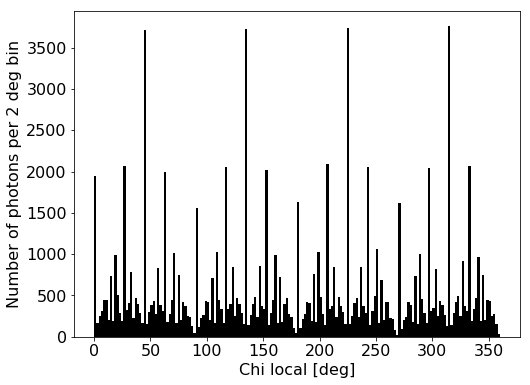

In [11]:
plt.hist(np.rad2deg(analysis.dataset.data['Chi local']),bins=np.linspace(0,360,181));
plt.xlabel('Chi local [deg]');
plt.ylabel('Number of photons per 2 deg bin');

<h3>You can use the data as they are and plot them as you like or use some built-in functions, e.g. plot the raw spectrum:</h3>

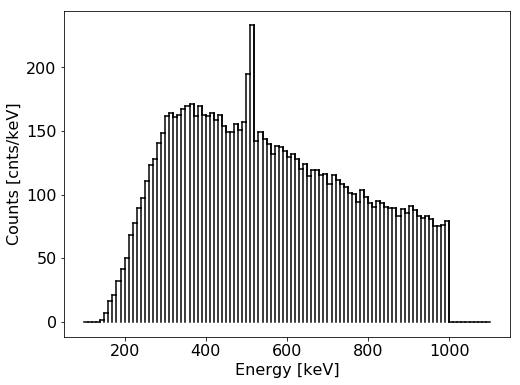

In [12]:
analysis.plot_raw_spectrum(bins=np.arange(100,1101,10))

<h3>Check where your source is compared to the observation you made.<br>
    Plot elevation four the test source, and for some other interesting objects and the Galactic centre:</h3>

In [13]:
l_crab, b_crab = 184.56-360, -5.78
l_cygx1, b_cygx1 = 71.33, 3.07
l_GC, b_GC = 0, 0
l_test, b_test = -10, -10

In [14]:
l_src = [l_crab,l_cygx1,l_GC,l_test]
b_src = [b_crab,b_cygx1,b_GC,b_test]
name_src = ['Crab','Cyg X-1','Galactic Centre','Test Source']

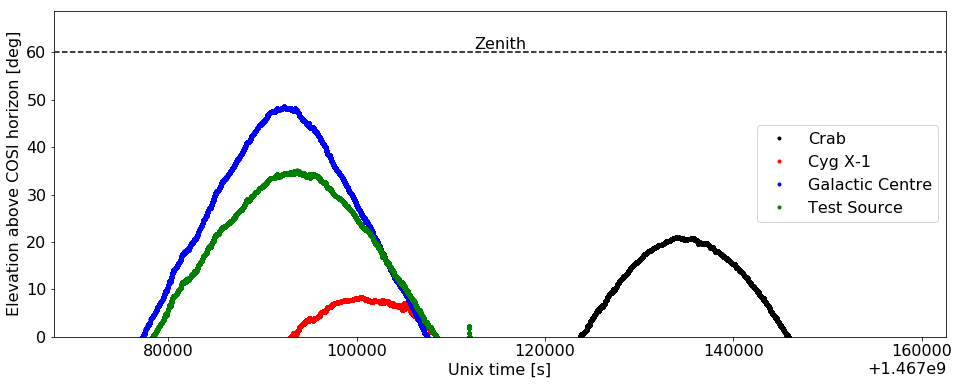

In [15]:
analysis.plot_elevation(l_src,b_src,name_src)

<h3>The horizon is set to 60 deg by default, it can be changed by the .horizon attribute.</h3>

In [16]:
#analysis.horizon = 180

<h3>Plot flight path in data set and sources</h3>

(-90, 90)

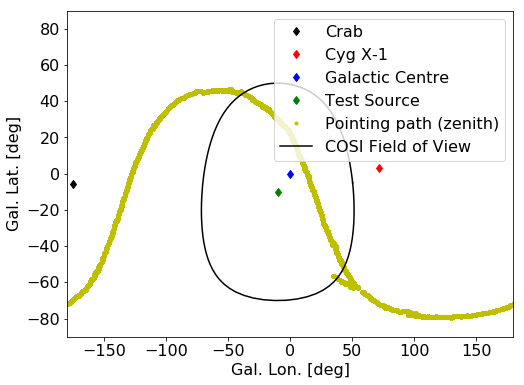

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for l,b,name in zip(l_src,b_src,name_src):
    ax.plot(l,b,'d',label=name)

ax.plot(analysis.dataset.l_pointing,analysis.dataset.b_pointing,'y.',label='Pointing path (zenith)')

# plot fov from the position of the simulated test source
fov = circle_on_the_sky(l_test,b_test,analysis.horizon)
ax.plot(fov[0],fov[1],color='black',label='COSI Field of View')

ax.legend()
ax.set_xlabel('Gal. Lon. [deg]')
ax.set_ylabel('Gal. Lat. [deg]')
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)

<h3>Clearly, the source is <em>not</em> seen all the time, as already indicated by the elevation plot.</h3>

<h3>Plot lightcurve</h3>

Time tags not binned, yet, binning for 1 hour intervals now ...


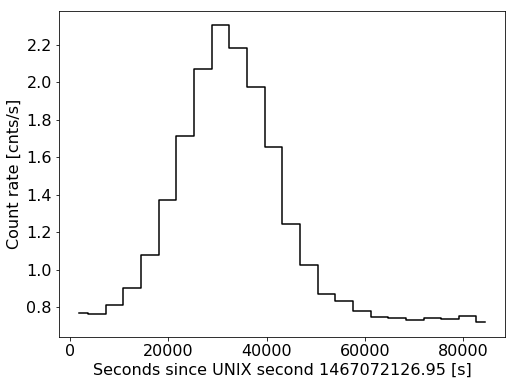

In [18]:
analysis.plot_lightcurve()

<h3>Define time binning: This should not be too long as we also chose times when the source was not in the FoV. It should also not be too short as this expands the data space very much and unnecessarily blows up the computing time (a very small time binning would be equivalent to an unbinned analysis and relies on the quality of the background and sky response).<br>
    Here, we use 60 min as test case. You might want to check other time intervals as well.</h3>

In [19]:
analysis.dataset.time_binning_tags(time_bin_size=3600)

In [20]:
analysis.dataset.plot_raw_spectrum()

Data not yet binned? Use get_binned_data() first.


<h3>The same plot_raw_spectrum() function for the dataset relies on an already binned array, which we did not define, yet (if you use the unbinned data in the initial COSIpy analysis object, plot_raw_spectrum() will now change to the chosen binning - be careful when redefining the binning).<br>
    We now define the remaining binning for energy and the pixel scale.<br>
    Energies go from ~150 to 1000 keV, and we expect a 511 keV line. So, here we use 6 energy bins, 150-325, 325-506, 506-516, 516-650, 650-825, 825-1000 keV, because we "know" what to expect. In general, a smaller energy binning is always(!) better as the included information is not lumped in a broad bin without structure. But the complete fit will take very long because the COSI data space is very large.<br>
    Because our response is binned in either 3 or 5 deg, we initialise our pixel size as 5 deg.</h3>

In [117]:
energy_bin_edges=np.array([150,325,506,516,650,825,1000])
#energy_bin_edges=np.array([506,516])

In [118]:
analysis.dataset.init_binning(energy_bin_edges=energy_bin_edges,
                              pixel_size=5.)

<h3>To set up the binned data set, run get_binned_data() after initialising time, energy, and pixel binning.</h3>

In [119]:
analysis.dataset.get_binned_data()

<h3>This creates a 4D array called binned_data, with dimensions of:
    <ul>
        <li>Time (24 60-min bins),</li>
        <li>Energy (6 energy bins),</li>
        <li>Phi (180/5 = 36 Compton scattering angle bins, and</li>
        <li>Chi/Psi (this is saved in MEGAlib's FISBEL binning, that defines the 2D sphere as a 1D array of equally-sized pixels, in this caes 1650 bins).</li>
    </ul>
</h3>

In [120]:
analysis.dataset.binned_data.shape

(24, 6, 36, 1650)

<h3>Now we can make is of the plotting routines for the binned data, and compare spectra for different time bins, or light curves for different energies.</h3>

Plotting spectrum for time bin number 10


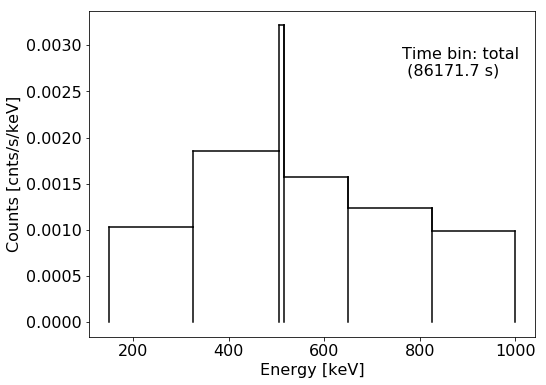

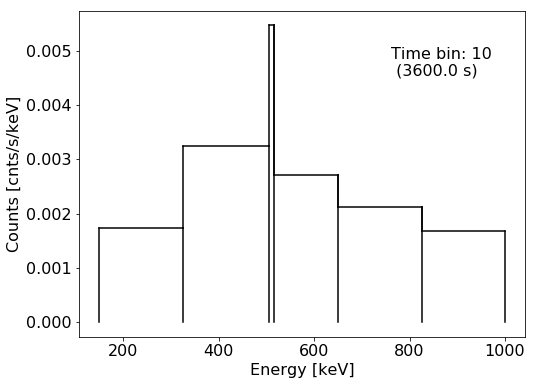

In [121]:
analysis.dataset.plot_raw_spectrum()
analysis.dataset.plot_raw_spectrum(10)

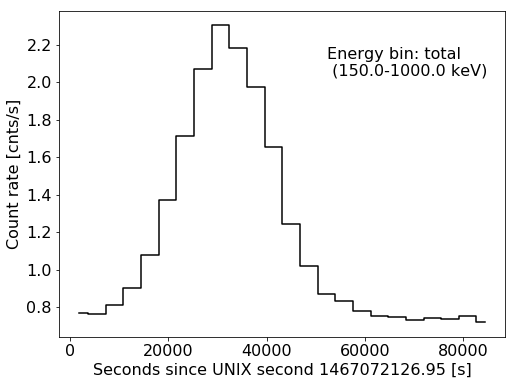

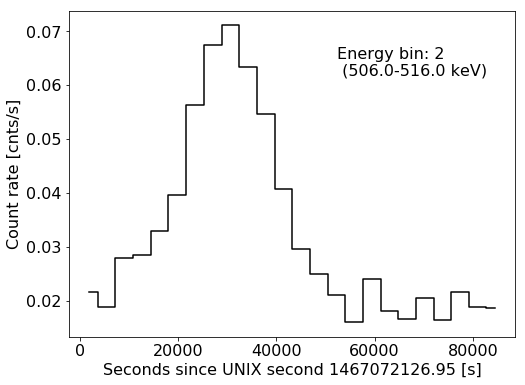

In [122]:
analysis.dataset.plot_lightcurve()
analysis.dataset.plot_lightcurve(2)

<h3>Now that we defined and prepared our data set, we define pointings for our observations. This is done with the Pointing() class that uses the dataset and the a stability criterion to define smaller time intervals within the 20 minute time bins and corresponding pointing directions to weight the response with in a later step.</h3>

In [123]:
pointings = Pointing(analysis.dataset)

<h3>Now, we take care of the background. A priori, we don't know which photon is background and which not. We use a response for the background that we can either extract from the data themselves (1), use a background simulation for example a Ling model (2), or use the most information that we have from the total flight (3). The three options all come with a considerable risk, as explained in the following:
    <ol>
        <li>This option should only be used if the data set is very large: typically, the COSI data space (CDS) with a binning of ~5 deg in phi (up to 60 deg), psi, and chi, consists of ~4500 bins. These have to be populated enough to obtain a useful response. A short exposure such as in this data set is not useful to fill the data space sufficiently.</li>
        <li>With a simulation, the data space for each energy bin can be filled quite nicely. You just have to wait for long enough. However, the simulation might not be representative for the actual data, as it doesn't take into account the true conditions of a measurement. In this case, a simulation might be good enough. Still, several hundreds of photons per CDS bin per energy bin are necessary to create such a response.</li>
        <li>Since during the 2016 flight, most of the photons detected are actually from background, this provides a nice representation of the true background response at each energy. Of course, this might not be representative for simulations. Still, the number of photons is so much larger in the flight than the time I could wait to finish such a simulation, that I will use this option here.</li>
    </ol>
</h3>

<h3>The background response and than the corresponding background model is created with the BG() class that takes the analysis.dataset, and then chooses among background responses from a (simulation) file (mode='from file') that has be prepared accordingly (see example of how to prepare a background model), from the flight (mode='default'), or creates a response from the data themselves (mode='from data').<br>
    In addition, a tracer can be included that defines the background variation for the fit later. We "know" the true background variation, but this is not true in general, and is taken from the shield rate, for example. Here, we use the Photo events as background tracer as extracted with the same selections as the Compton events. Note that there will be no binned_data array for the PE because there is no CDS.</h3>

Text(0, 0.5, 'Normalised Tracer')

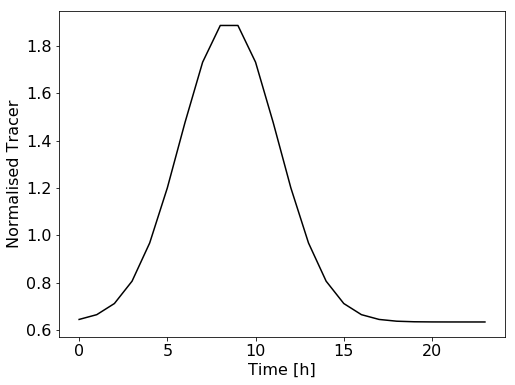

In [124]:
h = np.arange(0,24,1) # observation hours 0 to 24 in steps of 1/3 hours (20 min)
true_tracer = 1/3 + 2/3 * np.exp(-0.5*(h-8.5)**2/2.75**2) # true tracer function
# we normalise the tracer to be 1.0 on average, thus:
true_tracer /= np.mean(true_tracer)
plt.plot(h,true_tracer)
plt.xlabel('Time [h]')
plt.ylabel('Normalised Tracer')

<h3>Reading in extracted PE data set .tra file, binning as before in 1 hour, and then histrogramming the events to build a tracer. Note that we use <em>all</em> energies to build our tracer since the more background counts the better the tracer will trace the background and the small sky signal will drown.<br>
    Might also take a while since there are ~50 times more PE than CE.<br>
    (I create a tracer.npz file to not redo this every time).</h3>

In [125]:
PE_dir = 'data'
PE_filename = 'test_dataset_9det_PE0000-1000keV_EHCstandard.tra.gz'
    
try:
    with np.load('tracer.npz') as content:
        tracer = content['tracer']
        trac = content['trac']
except:
    print('File tracer.npz not found, reading in PE events now ...')
    pe_data = COSIpy(PE_dir,PE_filename)
    pe_data.read_COSI_DataSet()

<h3>To get the same time basis for the PE as for the CE, we shift pe_data to the data set's first entry:<?h3>

In [126]:
try:
    # histogramming PE data
    # note comment about time binning in BG case below:
    # to get the same time basis, we shift the pe_data time tags to the data set's
    trac = np.histogram(pe_data.dataset.data['TimeTags']-analysis.dataset.data['TimeTags'].min(),
                        bins=analysis.dataset.times.times_edges)

    # normalising tracer to show variation around 1.0
    tracer = trac[0]/np.mean(trac[0])

    # save tracer to file
    np.savez_compressed('tracer.npz',
                        tracer=tracer,
                        trac=trac)
except:
    print('Stuff already done')

Stuff already done


<h3>We compare the true tracer with the one extracted from the PEs:</h3>

Text(0, 0.5, 'Normalised Tracer')

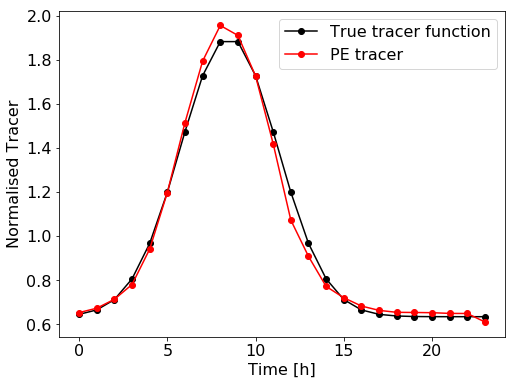

In [127]:
plt.plot(h,true_tracer,'o-',label='True tracer function')
plt.plot(h,tracer,'ro-',label='PE tracer')
plt.legend()
plt.xlabel('Time [h]')
plt.ylabel('Normalised Tracer')

<h3>The PE tracer predicts somewhat more (~10%) flux at the peak. Is this related to the source flux?<br>
    We read in only the source PE data and determine the contribution of the total source photons to the PE data:</h3>

In [128]:
PE_source_dir = 'data'
PE_source_filename = 'SRC9det_PS511keV_l-010_b-010_simOP_160628_FullDay_PE0000-1000keV_EHCstandard.tra.gz'
pe_source_data = COSIpy(PE_source_dir,PE_source_filename)
pe_source_data.read_COSI_DataSet()

In [129]:
# histogramming PE source data for comparison
# note the same shifting
trac_source = np.histogram(pe_source_data.dataset.data['TimeTags']-analysis.dataset.data['TimeTags'].min(),
                    bins=analysis.dataset.times.times_edges)

# normalising tracer to show variation around 1.0
tracer_source = trac_source[0]/np.mean(trac_source[0])

<h3>Now two plots comparing the total number of photons with each other, and then the percentage of the source photons to the total:</h3>

Text(0, 0.5, 'PE(SKY)/PE(TOT)')

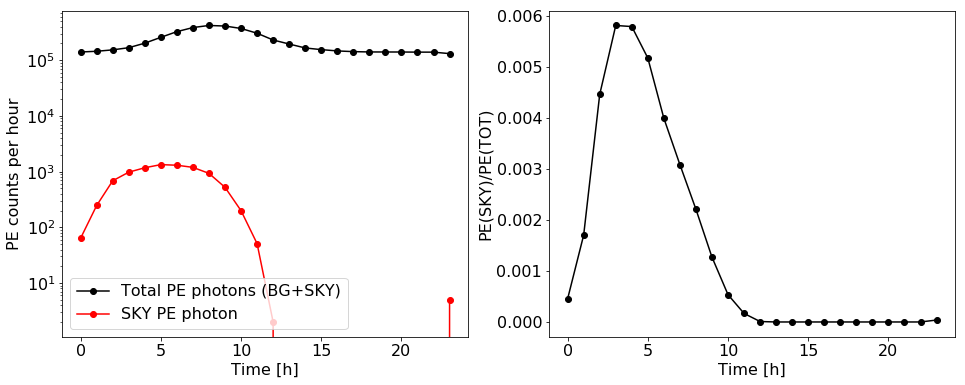

In [130]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(h,trac[0],'ko-',label='Total PE photons (BG+SKY)')
plt.plot(h,trac_source[0],'ro-',label='SKY PE photon')
plt.legend()
plt.xlabel('Time [h]')
plt.ylabel('PE counts per hour')
plt.yscale('log')

plt.subplot(122)
plt.plot(trac_source[0]/trac[0],'ko-')
plt.xlabel('Time [h]')
plt.ylabel('PE(SKY)/PE(TOT)')

<h3>The sky has at most 0.6% contribution to the tracer, and this maximmum contribution is not at the peak of the counts. We can thus nicely use the PE tracer for the background, even though there are a few sky counts.</h3>

In [131]:
background = BG(dataset=analysis.dataset,
                mode='default',#filename='flight_bg_511_v2.npz',
                tracer=tracer)

<h3>The background model should now have the same dimensions as the dataset:</h3>

In [132]:
background.bg_model.shape,analysis.dataset.binned_data.shape

((24, 6, 36, 1650), (24, 6, 36, 1650))

<h3>Because most of the CDS is actually zero and can be dropped in the analysis (<em>always</em> zero for the data set, <em>always</em> zero for the sky, and <em>always</em> zero for the background), as zeros will be fitted to zeros and just take computational power away. When defining the background, a reduced CDS, now in a single dimension, is also created. In the fit later, the data set and the sky response will be reduced to the same bins as the background. This is also why it is very important to have a sufficiently filled background response.</h3>

In [133]:
background.bg_model_reduced[2].shape

(24, 4243)

<h3>Rather than $36 \times 1650 = 59400$ CDS bins, we end up with $\sim4000$ (depending on the energy bin).</h3>

<h3>In general, the background tracer might not be good enough and a second-order adjustment could be made as a function of time. The BG() class has a function make_bg_cuts() that defines times and corresponding time bin incides for when to rescale the background. By default, only one background parameter is defined by calling BG(). Here, I show an example of a rescaling every three hour, i.e. every 3 time bins (and then reset it afterwards).</h3>

In [134]:
background.make_bg_cuts(#cuts=[])
                        cuts=list(np.arange(1,24,3)))

In [135]:
background.bg_cuts,background.idx_arr

(array([ 1,  1,  1,  4,  4,  4,  7,  7,  7, 10, 10, 10, 13, 13, 13, 16, 16,
        16, 19, 19, 19, 22, 22, 22]),
 array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8,
        8, 8]))

<h3>This means, the time bins 1, 2, and 3 all get the same parameter with the index 1, the time bins 4, 5, and 6 all get the same parameter with index 2, etc.; these are all ones of there is just one parameters.</h3>

In [136]:
background.make_bg_cuts(cuts=[])

<h3>Let us visually compare how our background model looks like with respect to the data set, and also the true simulated background. For the latter, we define a dataset with only the background .tra file.</h3>

In [137]:
bg_filename = 'BG9dets_LingWithPeak_simOP_160628_FullDay_CE0000-1000keV_EHCstandard.tra.gz'
bg_data = COSIpy(data_dir,bg_filename)
bg_data.read_COSI_DataSet()
bg_data.dataset.time_binning_tags(time_bin_size=3600)
bg_data.dataset.init_binning(energy_bin_edges=energy_bin_edges,
                             pixel_size=5.)
bg_data.dataset.get_binned_data()

<h3>(Note that the time binning in the data set and the background .tra file is not necessarily the same as the time bins are defined relative to the first photon, not absolute (will be added in a later version)).<br>
    Here, we only choose the 511 keV (number 2) for our comparison.</h3>

Text(0, 0.5, 'Counts in 1 h')

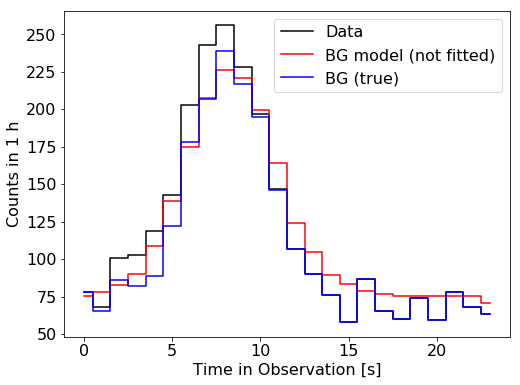

In [138]:
ebin = 2

plt.step(h,
         np.sum(analysis.dataset.binned_data[:,ebin,:,:],axis=(1,2)),
         where='mid',label='Data',color='black')

plt.step(h,
         np.sum(background.bg_model[:,ebin,:,:],axis=(1,2)),
         where='mid',label='BG model (not fitted)',color='red')

plt.step(h,
         np.sum(bg_data.dataset.binned_data[:,ebin,:,:],axis=(1,2)),
         where='mid',label='BG (true)',color='blue')

plt.legend()
plt.xlabel('Time in Observation [s]')
plt.ylabel('Counts in 1 h')

<h3>The Poisson character of the "true" background is evident. In fact, it is one realisation of the red curve with the correct scaling. This "correct" scaling will be determined by the maximum likelihood fit.<br>
    One can also see that there is some excess in the rising flank of the background where there are more black photons than blue photons. This is our signal, and it is apparently not very strong and at a particularly bad time near the maximum of the background.<br><br>
    Note that even using the true background model tracer will <em>not</em> result in a perfect spectral extraction because the sky response is also expected smooth in time, and its Poisson character will result in flux close, but not necessarily identical to, the simulated value (How this would be done is shown in the commented cell below).<br><br>
    Let's estimate what significance we can except if we new the true background (note that this estimate is very rough and since we are dealing with very small numbers potentially wrong (over-estimated)): $\sqrt{ \sum_t \left(\frac{S(t)}{\sqrt{S(t)+B(t)}}\right)^2}$ (cf. Li and Ma 1983).</h3>

In [139]:
"""
# using background tracer from the true sampled background model at the 511 keV bin
ebin = 0
background = BG(dataset=analysis.dataset,
                mode='from file',filename='flight_bg_511_v2.npz',
                tracer=np.mean(bg_data.dataset.binned_data[:,ebin,:,:],axis=(1,2))/
                       np.mean(bg_data.dataset.binned_data))""";

In [140]:
T = np.sum(analysis.dataset.binned_data[:,ebin,:,:],axis=(1,2))
B = np.sum(bg_data.dataset.binned_data[:,ebin,:,:],axis=(1,2))
S = T-B

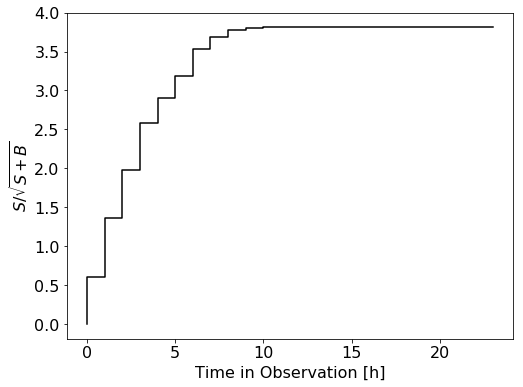

In [141]:
plt.step(h, np.sqrt( np.cumsum(S/np.sqrt(T)) ) )
plt.xlabel('Time in Observation [h]')
plt.ylabel(r'$S/\sqrt{S+B}$');

<h3>In a perfect world, where we could distinguish photons from the sky and the background, we can expect at most $5\sigma$ significance in this data set. However, if we could distinguish photons from the sky and the background, I'd rather throw away the background and only deal with the sky.<br><br>
    This is the best case that will never happen, but now we know what we could expect in terms of uncertainties: something between $3$ and $5\sigma$ appears plausible.</h3>

<h3>For the sky, we need to read in the CDS response (look at the response creation example). Right now, we only have the 511 keV response binned for use, but this can be used to extract a spectrum and show that the method works.<br>
    We import the response module and read in the (already binned and useable by python) response.</h3>

In [142]:
import response

In [143]:
rsp = response.SkyResponse('response/RegularResponseGrid_v1.npz',pixel_size=5.)

In [144]:
rsp.rsp.available_attributes

name
data
energies
pixel_size
pixel_area
n_fisbel_bins
n_phi_bins
fisbels
phis
response_grid_normed


In [145]:
rsp.rsp.name

'SkyResponse'

<h3>All the information is stored in the response_grid_normed array that contains the CDS response for a grid of sky (zenith/azimuth) coordinates, in this case in steps of 5 deg. The first two dimensions are the zenith and azimuth positions which will be interpolated to get other values, and the last two dimensions are the CDS as before.</h3>

In [146]:
rsp.rsp.response_grid_normed.shape

(36, 72, 36, 1650)

<h3>To understand what this now means, consider the following examples:<br><br>
    Typically, when you consider Compton telescopes, you find a photon for a certain combination of $\phi$, $\psi$, and $\chi$, an project the Compton cone back on the sky. Consider you found a photon at $\{\phi,\psi,\chi\} = \{27,40,177\}$, and want to see the Compton response projected onto the sky in the zenith/azimuth ($(Z,A)$) system of COSI.<br>
    We can use the plot_CDS_repsonse() function to illustrate the content of the reponse in both directions:</h3>

Plotting Compton response from (phi/psi/chi) = (27.0/40.0/177.0) to (Z/A):


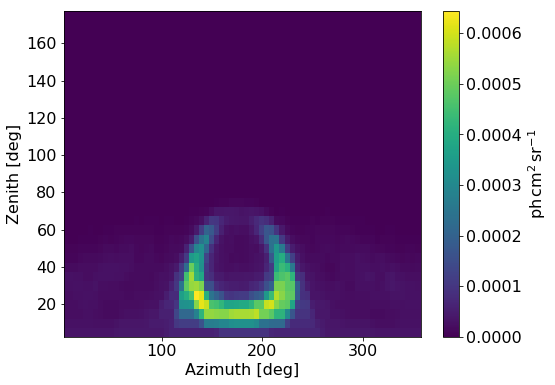

In [147]:
rsp.plot_CDS_response(phi=27,psi=40,chi=177)

<h3>In the case of using the response in a forward-folding manner, we do <em>not</em> consider all possible positions (in zenith and azimuth / Galactic latitude and longitude) one photon could have originated from (the Compton circle). But we rather ask the question, what is the probability that a photon, that originated from a certain (perhaps known) position, lands in a particular CDS (phi/psi/chi) bin. So, in particular, we could ask, what is the area (the effective area) that a photon from $(Z/A) = (20/120)$ sees in each $\{\phi,\psi,\chi\}$ bin. Because 3D plots are not very useful to show this, we choose a particular $\phi$-bin, to make a 2D plot:</h3>

Plotting Compton response from (Z/A) = (20.0/120.0) to (45.0/psi/chi):
This might take a little ...


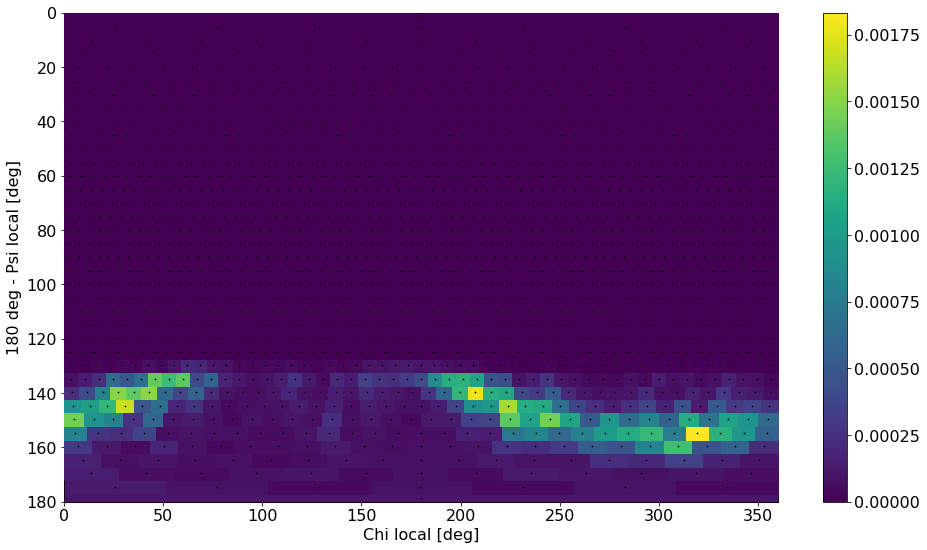

In [148]:
rsp.plot_CDS_response(zen=20,azi=120,phi=45)

<h3>A photon from $(Z/A) = (20/120)$ would never occupy the data space bin $\{\phi,\psi,\chi\} = \{45,10,100\}$, so if we mesured one there, if is probably background. The probability is calculated in the maximum likelihood fit below.</h3>

<h3>Once we loaded the general sky response, we can calculate the response for our particular point source with calculate_PS_response(). This fixes the position of the source so that we extract the spectrum from exactly that position in the sky.<br>
    We normalise the flux in each energy bin to a useful flux value, since otherwise, the fit has to deal with a braod range of possible scaling values. This is not too much a problem, but will take a lot more time towards convergence. Here we use $10^{-2}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$, since it is the value we used to simulate the data with.<br>
    For real data, this scaling depends on the source.<br>
    (In a later example, we might want to search for the source position (fit it), create a TS map (searching for point of highest significance versus a background-only fit, or fit diffuse emission models (templates).)</h3>

In [149]:
flux_norm = 1e-2
rsp.calculate_PS_response(analysis.dataset,
                          pointings,
                          l_test,b_test,flux_norm,
                          background=background)

<h3>This should <em>not</em> take very long as we only consider one point on a sphere. In addition, we can use the background response to define a reduced version of the CDS, similar to before.<br>
    We obtain a sky_response array for each energy bin defined, with the same time- and CDS-bin definitions as for the background.</h3>

In [150]:
rsp.sky_response[ebin].shape

(24, 4243)

<h3>Finally, we can compare the true Sky contribution $S$ to the expected response as a function of time. We also plot the PE data to check how this relates to either:</h3>

Text(0, 0.5, 'Counts in 1 h')

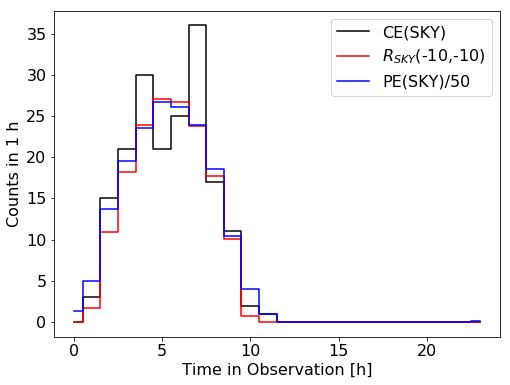

In [151]:
plt.step(h,S,color='black',where='mid',label='CE(SKY)')
plt.step(h,np.sum(rsp.sky_response[ebin],axis=1),where='mid',label=r'$R_{SKY}$(-10,-10)',color='red')
plt.step(h,trac_source[0]/50,where='mid',label='PE(SKY)/50',color='blue')
plt.legend()
plt.xlabel('Time in Observation [h]')
plt.ylabel('Counts in 1 h')

<h3>We see that the CEs (black) show considerable scatter, especially at the maximum. This is expected as a higher rate shows a higher absolute variance. The sky response at the source position of interest (red) is nicely predicting the general shape of CEs; of course, a smooth function will not predict the variation of Poisson process. Since the PEs (blue) have about 50 times more counts than the 511 keV bin, the (relative) variance is greatly reduced and the smooth up and down is visible. We see, however, that the wings of the blue curve are somewhat wider than the red one - this might be due to lack of photons at large zenith angles in the response, and potentially lead to a reduced flux. Nevertheless, this is as good as it gets and we are now rerady to set up a COSIpy fit() object to perform fits.</h3>

In [152]:
from fit import fit

<h3>The fit() object initialises the Stan model that fits the data. If this is done for the first time, this might take a bit, but must only be done once (for sky model fits, and for background only fits: bg_only=True).</h3>

In [153]:
result = fit(analysis.dataset,
             pointings,
             rsp,
             background)

<h3>Now we can fit the model as defined by all the things from above. For a quick check how the model performs, we can optimise the posterior distribution and obtain a Maximum A Posteriori (MAP) estimate. This comes without uncertainties, which we estimate in a later step by sampling the posteriors of the flux and background amplitudes:</h3>

In [154]:
result.MAP_solution()

Start optimising energy bin 1/6...
Start optimising energy bin 2/6...
Start optimising energy bin 3/6...
Start optimising energy bin 4/6...
Start optimising energy bin 5/6...
Start optimising energy bin 6/6...

Initial log joint probability = -26300.8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -26294.1     0.0336799      0.753989      0.0559           1       34   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      24      -26294.1      0.685399    0.00493976           1           1       40   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -47787.3
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -47786.9    0.00559662      0.901933   3.485e-05       0.001        3   
Optimization terminated normally: 
  Convergence detected: relat

<h3>The MAP estimate shouldn't take very long (of course, depending on the data set). The results are then stored in a dictionary per energy bin .fit_pars_map:</h3>

In [155]:
result.fit_pars_map[ebin]

OrderedDict([('par',
              OrderedDict([('flux', array(0.89311933)),
                           ('Abg', array(0.94825713)),
                           ('model_values',
                            array([0.00020445, 0.00020445, 0.00020445, ..., 0.00019108, 0.00019108,
                                   0.00019108])),
                           ('ppc', array([0., 0., 0., ..., 0., 0., 0.])),
                           ('model_tot',
                            array([ 71.61387262,  75.24976482,  87.9938899 , 101.8733189 ,
                                   124.53500819, 155.46457109, 189.94395183, 217.89028444,
                                   230.19060129, 218.42161028, 189.90741252, 155.50779996,
                                   117.58372701,  99.554066  ,  84.61059071,  78.98119236,
                                    74.86305214,  72.70542172,  71.73102441,  71.65156493,
                                    71.54765639,  71.19671036,  71.14883093,  66.93085701])),
          

<h3>Without uncertainties and proper scaling, the flux value obtain in this dictionary is not very useful. However, it does serve as a cross check of the model actually performs well (if you know what to expect). In particular, the dictionary's keys are:<br>
    <ul>
        <li>flux: scaling parameter of the convolved sky model ($F = \mathrm{flux}\cdot\mathrm{flux_{norm}}$).</li>
        <li>Abg: one (or more - per block) background amplitude scaling parameters. Depending on how the background was defined, a value smaller than 1.0 indicates a contribution from the sky; a value around 1.0 would be a background-dominated time block.</li>
        <li>model_values: total model values for <em>each</em> data point (rate per unit bin).</li>
        <li>ppc: posterior predictive check for <em>each</em> data point. Can be used to check model quality.</li>
        <li>model_tot: CDS-integrated total model, hence counts as a function of time.</li>
        <li>model_bg: CDS-integrated background model.</li>
        <li>model_sky: CDS-integrated sky model.</li>
        <li>value: log-posterior value; can be used to determine tests statistics (TS) when comparing to background-only fits, for example.</li>
    </ul>
    </h3>

<h3>The differential flux $F/dE$ per energy bin is saved in .diff_flux_map in units of $\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$:</h3>

In [156]:
print('MAP diff. flux estimate: %.5f; true value: %.5f' % (result.diff_flux_map[ebin],flux_norm/(analysis.dataset.energies.energy_bin_wid[ebin]*2)))

MAP diff. flux estimate: 0.00089; true value: 0.00100


In [157]:
print('MAP int. flux estimate: %.5f; true value: %.5f' % (result.diff_flux_map[ebin]*(analysis.dataset.energies.energy_bin_wid[ebin]*2),flux_norm))

MAP int. flux estimate: 0.00893; true value: 0.01000


<h3>Plotting the MAP estimate in the time domain (will be class function later):</h3>

Text(0, 0.5, 'Counts in 1 h')

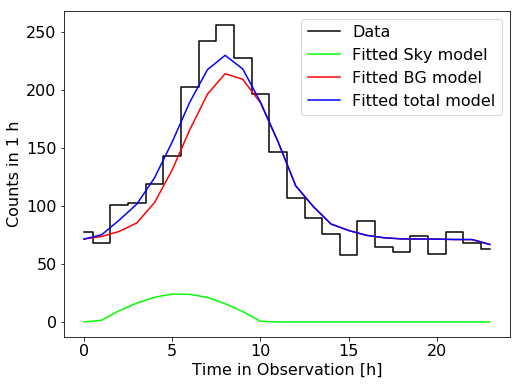

In [158]:
plt.step(h,np.sum(analysis.dataset.binned_data[:,ebin,:,:],axis=(1,2)),where='mid',label='Data',color='black')

sky_counts_time = result.fit_pars_map[ebin]['par']['model_sky'][0]
plt.plot(h,sky_counts_time,color='lime',label='Fitted Sky model')

bg_counts_time = result.fit_pars_map[ebin]['par']['model_bg']
plt.plot(h,bg_counts_time,color='red',label='Fitted BG model')

all_counts_time = result.fit_pars_map[ebin]['par']['model_tot']
plt.plot(h,all_counts_time,color='blue',label='Fitted total model')

plt.legend()

plt.xlabel('Time in Observation [h]')
plt.ylabel('Counts in 1 h')

<h3>Looks at least reasonable.<br>
    Now we perform a full fit by sampling the posterior distributions of flux and Abg:</h3>

In [159]:
result.fit()

###################################################################

Start fitting energy bin 1/6...
Summary for energy bin 1/6:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]    0.2    0.01   0.16 8.9e-3   0.06   0.18    0.3   0.59    245    1.0
Abg[1]     1.0  5.1e-4 8.4e-3   0.98   0.99    1.0    1.0   1.01    266    1.0

Samples were drawn using NUTS at Wed Jul 22 21:09:09 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/6...
Summary for energy bin 2/6:

Inference for Stan model: 

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: poisson_lpmf: Rate parameter[1] is nan, but must not be nan!  (in 'COSImodfit.stan' at line 80)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: poisson_lpmf: Rate parameter[1] is nan, but must not be nan!  (in 'COSImodfit.stan' at line 80)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



<h3>Depending on how large the actual data space is (time and CDS) and how many iterations for the samples (default iters=1000), this can take several minutes (per energy bin). Since this is the ~final fit, we only need to do this once to get our spectrum.<br>
    In the default setting, only the flux and Abg variables will be returned and saved into the dictionaries .fit_pars per energy bin. Full a full assessment of the fit, the pars keyword in a call to .fit() will also optinally save model_bg/sky/tot/values or ppc.<br>
    We end up with a Stan model results object from which we can plot our distributions of interest:</h3>

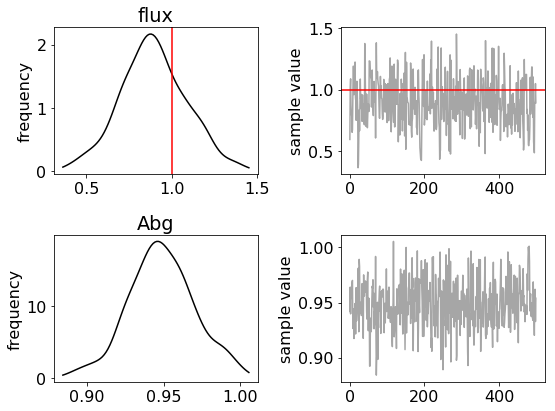

In [160]:
"""for i in range(analysis.dataset.energies.n_energy_bins):
    if i == ebin:
        true_val = 1.
    else:
        true_val = 0."""
pl = result.fit_pars[ebin].plot(['flux','Abg'])
pl.get_axes()[0].axvline(1,color='red')
pl.get_axes()[1].axhline(1,color='red')
plt.tight_layout()
plt.show()

<h3>The red lines indicate the true value for the flux in the chosen (511 keV) bin. Clearly, we meet our expectations and now also have uncertainties in the .diff_flux (median of posterior), .diff_flux_err (68.3th percentile), and .diff_flux_err2 (95.4th percentile) attributes (will be cellable output later):</h3>

In [161]:
o = 1e3
print('Fitted diff. flux [1e-3]: %.3f -%.3f +%.3f (1sigma), -%.3f +%.3f (2sigma); true value: %.3f' %
     (o*result.diff_flux[ebin],
      o*np.abs(result.diff_flux_err[ebin][0]),
      o*result.diff_flux_err[ebin][1],
      o*np.abs(result.diff_flux_err2[ebin][0]),
      o*result.diff_flux_err2[ebin][1],
      o*flux_norm/analysis.dataset.energies.energy_bin_wid[ebin]/2))

Fitted diff. flux [1e-3]: 0.886 -0.176 +0.202 (1sigma), -0.384 +0.404 (2sigma); true value: 1.000


<h3>Plotting the final spectrum with error bars (also result function later):</h3>

In [163]:
# and comapring to true sky data
sky_filename = 'SRC9det_PS511keV_l-010_b-010_simOP_160628_FullDay_CE0000-1000keV_EHCstandard.tra.gz'
sky_data = COSIpy(data_dir,sky_filename)
sky_data.read_COSI_DataSet()
sky_data.dataset.time_binning_tags(time_bin_size=1e5)
sky_data.dataset.init_binning(energy_bin_edges=energy_bin_edges,
                             pixel_size=5.)
sky_data.dataset.get_binned_data()

In [168]:
sky_data_counts = np.sum(sky_data.dataset.binned_data,axis=(0,2,3))/analysis.dataset.energies.energy_bin_wid/2

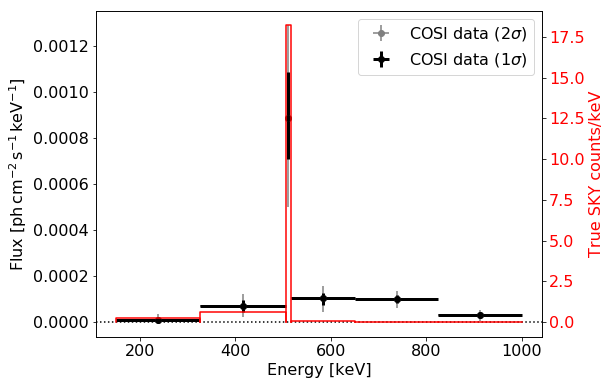

In [173]:
plt.errorbar(analysis.dataset.energies.energy_bin_cen,
             result.diff_flux,
             xerr=analysis.dataset.energies.energy_bin_wid,
             yerr=np.abs(result.diff_flux_err2.T),fmt='o',
             color='gray',label=r'COSI data ($2\sigma$)')

plt.errorbar(analysis.dataset.energies.energy_bin_cen,
             result.diff_flux,
             xerr=analysis.dataset.energies.energy_bin_wid,
             yerr=np.abs(result.diff_flux_err.T),
             fmt='o',linewidth=3,color='black',
             label=r'COSI data ($1\sigma$)')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

plt.axhline(0,linestyle=':')

plt.legend()

plt.twinx()



for e in range(analysis.dataset.energies.n_energy_bins):
    plt.plot([analysis.dataset.energies.energy_bin_min[e],
              analysis.dataset.energies.energy_bin_min[e],
              analysis.dataset.energies.energy_bin_max[e],
              analysis.dataset.energies.energy_bin_max[e]],
             [0,
              sky_data_counts[e],
              sky_data_counts[e],
              0],
             color='red')
plt.ylabel('True SKY counts/keV',color='red')
plt.yticks(color='red')

plt.savefig('Nova_sim_broadkeVbinning_spectrum.pdf')

<h3>Not completely perfect, but we also don't use the correct response.</h3>

<h3>Looking at the summary of a particular bin again is provided with the .stansummary:</h3>

In [83]:
print(result.fit_pars[0].stansummary(['flux','Abg']))

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]   0.21    0.01   0.18 9.4e-3   0.07   0.17   0.31   0.66    163   1.02
Abg[1]     1.0  5.4e-4 8.2e-3   0.98   0.99    1.0    1.0   1.02    233    1.0

Samples were drawn using NUTS at Wed Jul 22 19:46:34 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


<h3>To plot the fitted model in the time domain, now with uncertainties, we need to provide the posterior-sampled models in a second call to .fit() (in particular, this is not necessary all the time, especially when there is only one parameter for sky and background, but easier to access in this way):</h3>

In [84]:
result.fit(pars=['flux','Abg','model_tot','model_bg','model_sky'])

###################################################################

Start fitting energy bin 1/6...
Summary for energy bin 1/6:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]    0.2  9.4e-3   0.16 8.6e-3   0.09   0.16   0.27    0.6    285    1.0
Abg[1]     1.0  6.7e-4 8.7e-3   0.98   0.99    1.0   1.01   1.02    170    1.0

Samples were drawn using NUTS at Wed Jul 22 20:08:17 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/6...


Summary for energy bin 2/6:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]   1.19    0.05   0.48    0.3   0.87   1.16   1.53   2.11     89    1.0
Abg[1]    0.99  4.0e-4 6.3e-3   0.98   0.99   0.99    1.0   1.01    249    1.0

Samples were drawn using NUTS at Wed Jul 22 20:11:33 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 3/6...


Summary for energy bin 3/6:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]   0.89    0.01   0.19   0.51   0.77   0.88   1.02   1.24    250    1.0
Abg[1]    0.95  1.3e-3   0.02   0.91   0.94   0.95   0.96   0.99    258    1.0

Samples were drawn using NUTS at Wed Jul 22 20:13:46 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 4/6...


Summary for energy bin 4/6:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]   1.45    0.03   0.41   0.65   1.16   1.45   1.73   2.32    160   1.01
Abg[1]    0.99  5.8e-4 8.8e-3   0.97   0.98   0.99   0.99    1.0    232    1.0

Samples were drawn using NUTS at Wed Jul 22 20:16:42 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 5/6...
Summary for energy bin 5/6:



Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1]   1.75    0.03   0.31   1.17   1.52   1.74   1.96   2.34    114   1.05
Abg[1]    0.98  5.1e-4 8.1e-3   0.97   0.98   0.98   0.99    1.0    255   1.02

Samples were drawn using NUTS at Wed Jul 22 20:19:38 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 6/6...
Summary for energy bin 6/6:

Inference for Stan model: anon_model_666f42d8e949bfaf2d5a9470c57200bd.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500,

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: poisson_lpmf: Rate parameter[1] is nan, but must not be nan!  (in 'COSImodfit.stan' at line 80)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: poisson_lpmf: Rate parameter[1] is nan, but must not be nan!  (in 'COSImodfit.stan' at line 80)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected b

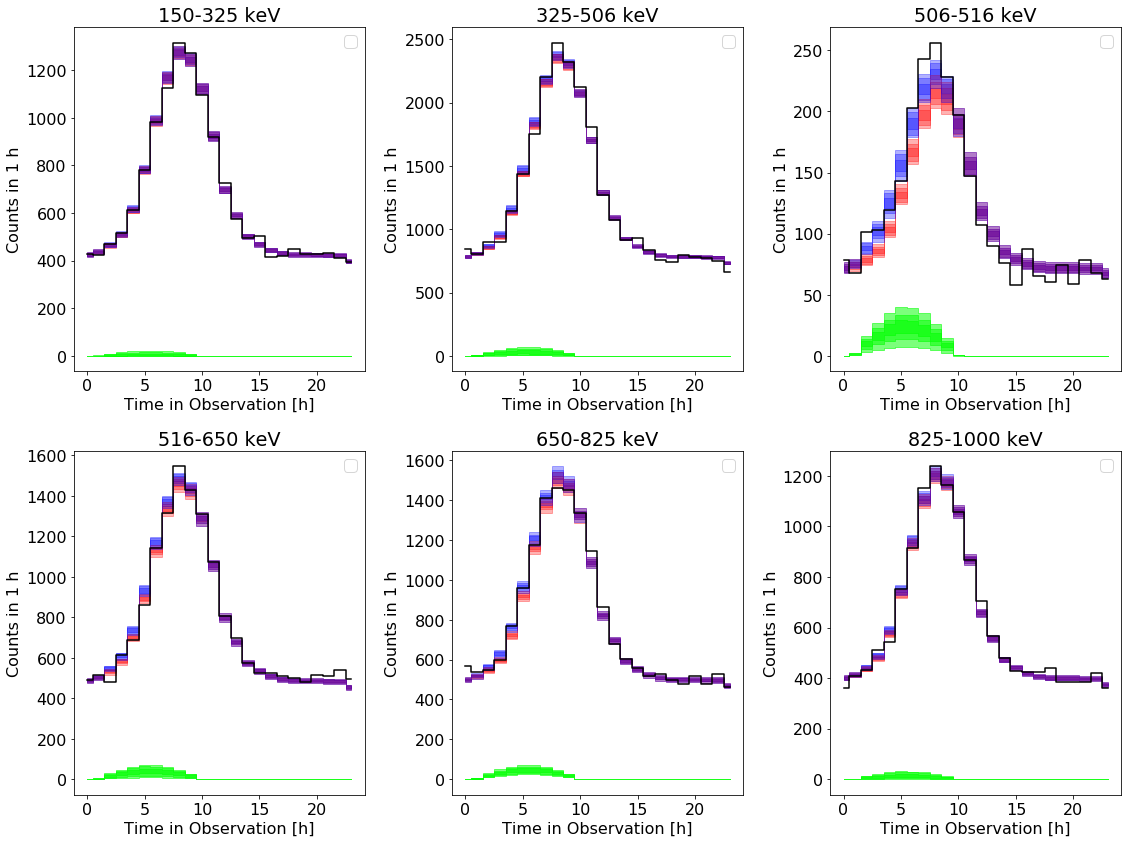

In [92]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

for e in range(analysis.dataset.energies.n_energy_bins):
    
    axis = ax.ravel()[e]
    
    axis.step(h,np.sum(analysis.dataset.binned_data[:,e,:,:],axis=(1,2)),where='mid')

    levels = [68.3,95.4,99.7]
    components = ['model_bg','model_tot']
    colours = ['red','blue']

    for l in levels:
        for c,co in zip(components,colours):
            axis.fill_between(h,
                             np.percentile(result.fit_pars[e]['model_sky'][:,0,:],50+l/2,axis=0),
                             np.percentile(result.fit_pars[e]['model_sky'][:,0,:],50-l/2,axis=0),
                             color='lime',alpha=0.3,step='mid')#,label=('Sky model' if l==levels[0] else ''))

            axis.fill_between(h,
                             np.percentile(result.fit_pars[e][c],50+l/2,axis=0),
                             np.percentile(result.fit_pars[e][c],50-l/2,axis=0),
                             color=co,alpha=0.3,step='mid')#,label=('BG model' if c==components[0] else 'Total model'))

    axis.legend()
    axis.set_xlabel('Time in Observation [h]')
    axis.set_ylabel('Counts in 1 h')
    axis.set_title(str(analysis.dataset.energies.energy_bin_min[e])+'-'+
                   str(analysis.dataset.energies.energy_bin_max[e])+' keV')
    
plt.tight_layout()

<h3>Creating a TS map:</h3>

<h3>First, we define a grid of test points we we loop over and extract the likelihood. Then we compare to a background-only fit to have a reasonable hypothesis test and perform a likelihood ratio test at each position:</h3>

In [99]:
num_l = 25
num_b = 25
# we can potentially use the full this just takes a long time,
# so we choose a region +-25 deg around the source of interest at (l/b) = (-10/-10)
# in 2 deg steps binned)
l_points_g = np.linspace(-35,15,(num_l+1))
b_points_g = np.linspace(-35,15,(num_b+1))
l_points = l_points_g[0:-1]+np.diff(l_points_g)[0]/2
b_points = b_points_g[0:-1]+np.diff(b_points_g)[0]/2
grid_g = np.meshgrid(l_points_g,b_points_g)
grid = np.meshgrid(l_points,b_points)

In [100]:
l_points

array([-34., -32., -30., -28., -26., -24., -22., -20., -18., -16., -14.,
       -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,
        10.,  12.,  14.])

<h3>We are inly interested in the 511 keV line here, so we redefine our binning. Otherwise, it would fit all 6 bins, and, again this would take a long time:</h3>

In [96]:
energy_bin_edges=np.array([506,516])
analysis.dataset.init_binning(energy_bin_edges=energy_bin_edges,
                              pixel_size=5.)
analysis.dataset.get_binned_data()
pointings = Pointing(analysis.dataset)
background = BG(dataset=analysis.dataset,tracer=tracer)

In [98]:
rsp = response.SkyResponse('response/RegularResponseGrid_v1.npz',pixel_size=5.)
# this step is actually not needed but returns a bug otherwise (will change later)
rsp.calculate_PS_response(analysis.dataset,
                          pointings,
                          l_test,b_test,flux_norm,
                          background=background)
result_TS = fit(analysis.dataset,
                 pointings,
                 rsp,
                 background)

<h5>Failed fits at certain source positions (e.g. outside the FoV) are not reconsidered but get a NaN entry.<br>
    This example runs $25 \times 25 = 625$ test sources. Takes about half an hour.</h5>

In [101]:
result_TS.TS_map(grid)

This will be a background only fit.


Start optimising energy bin 1/1...



-34.0 -34.0


Start optimising energy bin 1/1...
-32.0 -34.0


Start optimising energy bin 1/1...
-30.0 -34.0


Start optimising energy bin 1/1...
-28.0 -34.0


Start optimising energy bin 1/1...
-26.0 -34.0


Start optimising energy bin 1/1...
-24.0 -34.0


Start optimising energy bin 1/1...
-22.0 -34.0


Start optimising energy bin 1/1...
-20.0 -34.0


Start optimising energy bin 1/1...
-18.0 -34.0


Start optimising energy bin 1/1...
-16.0 -34.0


Start optimising energy bin 1/1...
-14.0 -34.0


Start optimising energy bin 1/1...
-12.0 -34.0


Start optimising energy bin 1/1...
-10.0 -34.0


Start optimising energy bin 1/1...
-8.0 -34.0


Start optimising energy bin 1/1...
-6.0 -34.0


Start optimising energy bin 1/1...
-4.0 -34.0


Start optimising energy bin 1/1...
-2.0 -34.0


Start optimising energy bin 1/1...
0.0 -34.0


Start optimising energy bin 1/1...
2.0 -34.0


Start optimising energy bin 1/1...
4.0 -34.0


Start optimising energy bin 1/1...
6.0 -34.0


Start optimising energy bin 1/1...
8.0 -34.0


Start optimising energy bin 1/1...
10.0 -34.0


Start optimising energy bin 1/1...
12.0 -34.0


Start optimising energy bin 1/1...
14.0 -34.0


Start optimising energy bin 1/1...
-34.0 -32.0


Start optimising energy bin 1/1...
-32.0 -32.0


Start optimising energy bin 1/1...
-30.0 -32.0


Start optimising energy bin 1/1...
-28.0 -32.0


Start optimising energy bin 1/1...
-26.0 -32.0


Start optimising energy bin 1/1...
-24.0 -32.0


Start optimising energy bin 1/1...
-22.0 -32.0


Start optimising energy bin 1/1...
-20.0 -32.0


Start optimising energy bin 1/1...
-18.0 -32.0


Start optimising energy bin 1/1...
-16.0 -32.0


Start optimising energy bin 1/1...
-14.0 -32.0


Start optimising energy bin 1/1...
-12.0 -32.0


Start optimising energy bin 1/1...
-10.0 -32.0


Start optimising energy bin 1/1...
-8.0 -32.0


Start optimising energy bin 1/1...
-6.0 -32.0


Start optimising energy bin 1/1...
-4.0 -32.0


Start optimising energy bin 1/1...
-2.0 -32.0


Start optimising energy bin 1/1...
0.0 -32.0


Start optimising energy bin 1/1...
2.0 -32.0


Start optimising energy bin 1/1...
4.0 -32.0


Start optimising energy bin 1/1...
6.0 -32.0


Start optimising energy bin 1/1...
8.0 -32.0


Start optimising energy bin 1/1...
10.0 -32.0


Start optimising energy bin 1/1...
12.0 -32.0


Start optimising energy bin 1/1...
14.0 -32.0


Start optimising energy bin 1/1...
-34.0 -30.0


Start optimising energy bin 1/1...
-32.0 -30.0


Start optimising energy bin 1/1...
-30.0 -30.0


Start optimising energy bin 1/1...
-28.0 -30.0


Start optimising energy bin 1/1...
-26.0 -30.0


Start optimising energy bin 1/1...
-24.0 -30.0


Start optimising energy bin 1/1...
-22.0 -30.0


Start optimising energy bin 1/1...
-20.0 -30.0


Start optimising energy bin 1/1...
-18.0 -30.0


Start optimising energy bin 1/1...
-16.0 -30.0


Start optimising energy bin 1/1...
-14.0 -30.0


Start optimising energy bin 1/1...
-12.0 -30.0


Start optimising energy bin 1/1...
-10.0 -30.0


Start optimising energy bin 1/1...
-8.0 -30.0


Start optimising energy bin 1/1...
-6.0 -30.0


Start optimising energy bin 1/1...
-4.0 -30.0


Start optimising energy bin 1/1...
-2.0 -30.0


Start optimising energy bin 1/1...
0.0 -30.0


Start optimising energy bin 1/1...
2.0 -30.0


Start optimising energy bin 1/1...
4.0 -30.0


Start optimising energy bin 1/1...
6.0 -30.0


Start optimising energy bin 1/1...
8.0 -30.0


Start optimising energy bin 1/1...
10.0 -30.0


Start optimising energy bin 1/1...
12.0 -30.0


Start optimising energy bin 1/1...
14.0 -30.0


Start optimising energy bin 1/1...
-34.0 -28.0


Start optimising energy bin 1/1...
-32.0 -28.0


Start optimising energy bin 1/1...
-30.0 -28.0


Start optimising energy bin 1/1...
-28.0 -28.0


Start optimising energy bin 1/1...
-26.0 -28.0


Start optimising energy bin 1/1...
-24.0 -28.0


Start optimising energy bin 1/1...
-22.0 -28.0


Start optimising energy bin 1/1...
-20.0 -28.0


Start optimising energy bin 1/1...
-18.0 -28.0


Start optimising energy bin 1/1...
-16.0 -28.0


Start optimising energy bin 1/1...
-14.0 -28.0


Start optimising energy bin 1/1...
-12.0 -28.0


Start optimising energy bin 1/1...
-10.0 -28.0


Start optimising energy bin 1/1...
-8.0 -28.0


Start optimising energy bin 1/1...
-6.0 -28.0


Start optimising energy bin 1/1...
-4.0 -28.0


Start optimising energy bin 1/1...
-2.0 -28.0


Start optimising energy bin 1/1...
0.0 -28.0


Start optimising energy bin 1/1...
2.0 -28.0


Start optimising energy bin 1/1...
4.0 -28.0


Start optimising energy bin 1/1...
6.0 -28.0


Start optimising energy bin 1/1...
8.0 -28.0


Start optimising energy bin 1/1...
10.0 -28.0


Start optimising energy bin 1/1...
12.0 -28.0


Start optimising energy bin 1/1...
14.0 -28.0


Start optimising energy bin 1/1...
-34.0 -26.0


Start optimising energy bin 1/1...
-32.0 -26.0


Start optimising energy bin 1/1...
-30.0 -26.0


Start optimising energy bin 1/1...
-28.0 -26.0


Start optimising energy bin 1/1...
-26.0 -26.0


Start optimising energy bin 1/1...
-24.0 -26.0


Start optimising energy bin 1/1...
-22.0 -26.0


Start optimising energy bin 1/1...
-20.0 -26.0


Start optimising energy bin 1/1...
-18.0 -26.0


Start optimising energy bin 1/1...
-16.0 -26.0


Start optimising energy bin 1/1...
-14.0 -26.0


Start optimising energy bin 1/1...
-12.0 -26.0


Start optimising energy bin 1/1...
-10.0 -26.0


Start optimising energy bin 1/1...
-8.0 -26.0


Start optimising energy bin 1/1...
-6.0 -26.0


Start optimising energy bin 1/1...
-4.0 -26.0


Start optimising energy bin 1/1...
-2.0 -26.0


Start optimising energy bin 1/1...
0.0 -26.0


Start optimising energy bin 1/1...
2.0 -26.0


Start optimising energy bin 1/1...
4.0 -26.0


Start optimising energy bin 1/1...
6.0 -26.0


Start optimising energy bin 1/1...
8.0 -26.0


Start optimising energy bin 1/1...
10.0 -26.0


Start optimising energy bin 1/1...
12.0 -26.0


Start optimising energy bin 1/1...
14.0 -26.0


Start optimising energy bin 1/1...
-34.0 -24.0


Start optimising energy bin 1/1...
-32.0 -24.0


Start optimising energy bin 1/1...
-30.0 -24.0


Start optimising energy bin 1/1...
-28.0 -24.0


Start optimising energy bin 1/1...
-26.0 -24.0


Start optimising energy bin 1/1...
-24.0 -24.0


Start optimising energy bin 1/1...
-22.0 -24.0


Start optimising energy bin 1/1...
-20.0 -24.0


Start optimising energy bin 1/1...
-18.0 -24.0


Start optimising energy bin 1/1...
-16.0 -24.0


Start optimising energy bin 1/1...
-14.0 -24.0


Start optimising energy bin 1/1...
-12.0 -24.0


Start optimising energy bin 1/1...
-10.0 -24.0


Start optimising energy bin 1/1...
-8.0 -24.0


Start optimising energy bin 1/1...
-6.0 -24.0


Start optimising energy bin 1/1...
-4.0 -24.0


Start optimising energy bin 1/1...
-2.0 -24.0


Start optimising energy bin 1/1...
0.0 -24.0


Start optimising energy bin 1/1...
2.0 -24.0


Start optimising energy bin 1/1...
4.0 -24.0


Start optimising energy bin 1/1...
6.0 -24.0


Start optimising energy bin 1/1...
8.0 -24.0


Start optimising energy bin 1/1...
10.0 -24.0


Start optimising energy bin 1/1...
12.0 -24.0


Start optimising energy bin 1/1...
14.0 -24.0


Start optimising energy bin 1/1...
-34.0 -22.0


Start optimising energy bin 1/1...
-32.0 -22.0


Start optimising energy bin 1/1...
-30.0 -22.0


Start optimising energy bin 1/1...
-28.0 -22.0


Start optimising energy bin 1/1...
-26.0 -22.0


Start optimising energy bin 1/1...
-24.0 -22.0


Start optimising energy bin 1/1...
-22.0 -22.0


Start optimising energy bin 1/1...
-20.0 -22.0


Start optimising energy bin 1/1...
-18.0 -22.0


Start optimising energy bin 1/1...
-16.0 -22.0


Start optimising energy bin 1/1...
-14.0 -22.0


Start optimising energy bin 1/1...
-12.0 -22.0


Start optimising energy bin 1/1...
-10.0 -22.0


Start optimising energy bin 1/1...
-8.0 -22.0


Start optimising energy bin 1/1...
-6.0 -22.0


Start optimising energy bin 1/1...
-4.0 -22.0


Start optimising energy bin 1/1...
-2.0 -22.0


Start optimising energy bin 1/1...
0.0 -22.0


Start optimising energy bin 1/1...
2.0 -22.0


Start optimising energy bin 1/1...
4.0 -22.0


Start optimising energy bin 1/1...
6.0 -22.0


Start optimising energy bin 1/1...
8.0 -22.0


Start optimising energy bin 1/1...
10.0 -22.0


Start optimising energy bin 1/1...
12.0 -22.0


Start optimising energy bin 1/1...
14.0 -22.0


Start optimising energy bin 1/1...
-34.0 -20.0


Start optimising energy bin 1/1...
-32.0 -20.0


Start optimising energy bin 1/1...
-30.0 -20.0


Start optimising energy bin 1/1...
-28.0 -20.0


Start optimising energy bin 1/1...
-26.0 -20.0


Start optimising energy bin 1/1...
-24.0 -20.0


Start optimising energy bin 1/1...
-22.0 -20.0


Start optimising energy bin 1/1...
-20.0 -20.0


Start optimising energy bin 1/1...
-18.0 -20.0


Start optimising energy bin 1/1...
-16.0 -20.0


Start optimising energy bin 1/1...
-14.0 -20.0


Start optimising energy bin 1/1...
-12.0 -20.0


Start optimising energy bin 1/1...
-10.0 -20.0


Start optimising energy bin 1/1...
-8.0 -20.0


Start optimising energy bin 1/1...
-6.0 -20.0


Start optimising energy bin 1/1...
-4.0 -20.0


Start optimising energy bin 1/1...
-2.0 -20.0


Start optimising energy bin 1/1...
0.0 -20.0


Start optimising energy bin 1/1...
2.0 -20.0


Start optimising energy bin 1/1...
4.0 -20.0


Start optimising energy bin 1/1...
6.0 -20.0


Start optimising energy bin 1/1...
8.0 -20.0


Start optimising energy bin 1/1...
10.0 -20.0


Start optimising energy bin 1/1...
12.0 -20.0


Start optimising energy bin 1/1...
14.0 -20.0


Start optimising energy bin 1/1...
-34.0 -18.0


Start optimising energy bin 1/1...
-32.0 -18.0


Start optimising energy bin 1/1...
-30.0 -18.0


Start optimising energy bin 1/1...
-28.0 -18.0


Start optimising energy bin 1/1...
-26.0 -18.0


Start optimising energy bin 1/1...
-24.0 -18.0


Start optimising energy bin 1/1...
-22.0 -18.0


Start optimising energy bin 1/1...
-20.0 -18.0


Start optimising energy bin 1/1...
-18.0 -18.0


Start optimising energy bin 1/1...
-16.0 -18.0


Start optimising energy bin 1/1...
-14.0 -18.0


Start optimising energy bin 1/1...
-12.0 -18.0


Start optimising energy bin 1/1...
-10.0 -18.0


Start optimising energy bin 1/1...
-8.0 -18.0


Start optimising energy bin 1/1...
-6.0 -18.0


Start optimising energy bin 1/1...
-4.0 -18.0


Start optimising energy bin 1/1...
-2.0 -18.0


Start optimising energy bin 1/1...
0.0 -18.0


Start optimising energy bin 1/1...
2.0 -18.0


Start optimising energy bin 1/1...
4.0 -18.0


Start optimising energy bin 1/1...
6.0 -18.0


Start optimising energy bin 1/1...
8.0 -18.0


Start optimising energy bin 1/1...
10.0 -18.0


Start optimising energy bin 1/1...
12.0 -18.0


Start optimising energy bin 1/1...
14.0 -18.0


Start optimising energy bin 1/1...
-34.0 -16.0


Start optimising energy bin 1/1...
-32.0 -16.0


Start optimising energy bin 1/1...
-30.0 -16.0


Start optimising energy bin 1/1...
-28.0 -16.0


Start optimising energy bin 1/1...
-26.0 -16.0


Start optimising energy bin 1/1...
-24.0 -16.0


Start optimising energy bin 1/1...
-22.0 -16.0


Start optimising energy bin 1/1...
-20.0 -16.0


Start optimising energy bin 1/1...
-18.0 -16.0


Start optimising energy bin 1/1...
-16.0 -16.0


Start optimising energy bin 1/1...
-14.0 -16.0


Start optimising energy bin 1/1...
-12.0 -16.0


Start optimising energy bin 1/1...
-10.0 -16.0


Start optimising energy bin 1/1...
-8.0 -16.0


Start optimising energy bin 1/1...
-6.0 -16.0


Start optimising energy bin 1/1...
-4.0 -16.0


Start optimising energy bin 1/1...
-2.0 -16.0


Start optimising energy bin 1/1...
0.0 -16.0


Start optimising energy bin 1/1...
2.0 -16.0


Start optimising energy bin 1/1...
4.0 -16.0


Start optimising energy bin 1/1...
6.0 -16.0


Start optimising energy bin 1/1...
8.0 -16.0


Start optimising energy bin 1/1...
10.0 -16.0


Start optimising energy bin 1/1...
12.0 -16.0


Start optimising energy bin 1/1...
14.0 -16.0


Start optimising energy bin 1/1...
-34.0 -14.0


Start optimising energy bin 1/1...
-32.0 -14.0


Start optimising energy bin 1/1...
-30.0 -14.0


Start optimising energy bin 1/1...
-28.0 -14.0


Start optimising energy bin 1/1...
-26.0 -14.0


Start optimising energy bin 1/1...
-24.0 -14.0


Start optimising energy bin 1/1...
-22.0 -14.0


Start optimising energy bin 1/1...
-20.0 -14.0


Start optimising energy bin 1/1...
-18.0 -14.0


Start optimising energy bin 1/1...
-16.0 -14.0


Start optimising energy bin 1/1...
-14.0 -14.0


Start optimising energy bin 1/1...
-12.0 -14.0


Start optimising energy bin 1/1...
-10.0 -14.0


Start optimising energy bin 1/1...
-8.0 -14.0


Start optimising energy bin 1/1...
-6.0 -14.0


Start optimising energy bin 1/1...
-4.0 -14.0


Start optimising energy bin 1/1...
-2.0 -14.0


Start optimising energy bin 1/1...
0.0 -14.0


Start optimising energy bin 1/1...
2.0 -14.0


Start optimising energy bin 1/1...
4.0 -14.0


Start optimising energy bin 1/1...
6.0 -14.0


Start optimising energy bin 1/1...
8.0 -14.0


Start optimising energy bin 1/1...
10.0 -14.0


Start optimising energy bin 1/1...
12.0 -14.0


Start optimising energy bin 1/1...
14.0 -14.0


Start optimising energy bin 1/1...
-34.0 -12.0


Start optimising energy bin 1/1...
-32.0 -12.0


Start optimising energy bin 1/1...
-30.0 -12.0


Start optimising energy bin 1/1...
-28.0 -12.0


Start optimising energy bin 1/1...
-26.0 -12.0


Start optimising energy bin 1/1...
-24.0 -12.0


Start optimising energy bin 1/1...
-22.0 -12.0


Start optimising energy bin 1/1...
-20.0 -12.0


Start optimising energy bin 1/1...
-18.0 -12.0


Start optimising energy bin 1/1...
-16.0 -12.0


Start optimising energy bin 1/1...
-14.0 -12.0


Start optimising energy bin 1/1...
-12.0 -12.0


Start optimising energy bin 1/1...
-10.0 -12.0


Start optimising energy bin 1/1...
-8.0 -12.0


Start optimising energy bin 1/1...
-6.0 -12.0


Start optimising energy bin 1/1...
-4.0 -12.0


Start optimising energy bin 1/1...
-2.0 -12.0


Start optimising energy bin 1/1...
0.0 -12.0


Start optimising energy bin 1/1...
2.0 -12.0


Start optimising energy bin 1/1...
4.0 -12.0


Start optimising energy bin 1/1...
6.0 -12.0


Start optimising energy bin 1/1...
8.0 -12.0


Start optimising energy bin 1/1...
10.0 -12.0


Start optimising energy bin 1/1...
12.0 -12.0


Start optimising energy bin 1/1...
14.0 -12.0


Start optimising energy bin 1/1...
-34.0 -10.0


Start optimising energy bin 1/1...
-32.0 -10.0


Start optimising energy bin 1/1...
-30.0 -10.0


Start optimising energy bin 1/1...
-28.0 -10.0


Start optimising energy bin 1/1...
-26.0 -10.0


Start optimising energy bin 1/1...
-24.0 -10.0


Start optimising energy bin 1/1...
-22.0 -10.0


Start optimising energy bin 1/1...
-20.0 -10.0


Start optimising energy bin 1/1...
-18.0 -10.0


Start optimising energy bin 1/1...
-16.0 -10.0


Start optimising energy bin 1/1...
-14.0 -10.0


Start optimising energy bin 1/1...
-12.0 -10.0


Start optimising energy bin 1/1...
-10.0 -10.0


Start optimising energy bin 1/1...
-8.0 -10.0


Start optimising energy bin 1/1...
-6.0 -10.0


Start optimising energy bin 1/1...
-4.0 -10.0


Start optimising energy bin 1/1...
-2.0 -10.0


Start optimising energy bin 1/1...
0.0 -10.0


Start optimising energy bin 1/1...
2.0 -10.0


Start optimising energy bin 1/1...
4.0 -10.0


Start optimising energy bin 1/1...
6.0 -10.0


Start optimising energy bin 1/1...
8.0 -10.0


Start optimising energy bin 1/1...
10.0 -10.0


Start optimising energy bin 1/1...
12.0 -10.0


Start optimising energy bin 1/1...
14.0 -10.0


Start optimising energy bin 1/1...
-34.0 -8.0


Start optimising energy bin 1/1...
-32.0 -8.0


Start optimising energy bin 1/1...
-30.0 -8.0


Start optimising energy bin 1/1...
-28.0 -8.0


Start optimising energy bin 1/1...
-26.0 -8.0


Start optimising energy bin 1/1...
-24.0 -8.0


Start optimising energy bin 1/1...
-22.0 -8.0


Start optimising energy bin 1/1...
-20.0 -8.0


Start optimising energy bin 1/1...
-18.0 -8.0


Start optimising energy bin 1/1...
-16.0 -8.0


Start optimising energy bin 1/1...
-14.0 -8.0


Start optimising energy bin 1/1...
-12.0 -8.0


Start optimising energy bin 1/1...
-10.0 -8.0


Start optimising energy bin 1/1...
-8.0 -8.0


Start optimising energy bin 1/1...
-6.0 -8.0


Start optimising energy bin 1/1...
-4.0 -8.0


Start optimising energy bin 1/1...
-2.0 -8.0


Start optimising energy bin 1/1...
0.0 -8.0


Start optimising energy bin 1/1...
2.0 -8.0


Start optimising energy bin 1/1...
4.0 -8.0


Start optimising energy bin 1/1...
6.0 -8.0


Start optimising energy bin 1/1...
8.0 -8.0


Start optimising energy bin 1/1...
10.0 -8.0


Start optimising energy bin 1/1...
12.0 -8.0


Start optimising energy bin 1/1...
14.0 -8.0


Start optimising energy bin 1/1...
-34.0 -6.0


Start optimising energy bin 1/1...
-32.0 -6.0


Start optimising energy bin 1/1...
-30.0 -6.0


Start optimising energy bin 1/1...
-28.0 -6.0


Start optimising energy bin 1/1...
-26.0 -6.0


Start optimising energy bin 1/1...
-24.0 -6.0


Start optimising energy bin 1/1...
-22.0 -6.0


Start optimising energy bin 1/1...
-20.0 -6.0


Start optimising energy bin 1/1...
-18.0 -6.0


Start optimising energy bin 1/1...
-16.0 -6.0


Start optimising energy bin 1/1...
-14.0 -6.0


Start optimising energy bin 1/1...
-12.0 -6.0


Start optimising energy bin 1/1...
-10.0 -6.0


Start optimising energy bin 1/1...
-8.0 -6.0


Start optimising energy bin 1/1...
-6.0 -6.0


Start optimising energy bin 1/1...
-4.0 -6.0


Start optimising energy bin 1/1...
-2.0 -6.0


Start optimising energy bin 1/1...
0.0 -6.0


Start optimising energy bin 1/1...
2.0 -6.0


Start optimising energy bin 1/1...
4.0 -6.0


Start optimising energy bin 1/1...
6.0 -6.0


Start optimising energy bin 1/1...
8.0 -6.0


Start optimising energy bin 1/1...
10.0 -6.0


Start optimising energy bin 1/1...
12.0 -6.0


Start optimising energy bin 1/1...
14.0 -6.0


Start optimising energy bin 1/1...
-34.0 -4.0


Start optimising energy bin 1/1...
-32.0 -4.0


Start optimising energy bin 1/1...
-30.0 -4.0


Start optimising energy bin 1/1...
-28.0 -4.0


Start optimising energy bin 1/1...
-26.0 -4.0


Start optimising energy bin 1/1...
-24.0 -4.0


Start optimising energy bin 1/1...
-22.0 -4.0


Start optimising energy bin 1/1...
-20.0 -4.0


Start optimising energy bin 1/1...
-18.0 -4.0


Start optimising energy bin 1/1...
-16.0 -4.0


Start optimising energy bin 1/1...
-14.0 -4.0


Start optimising energy bin 1/1...
-12.0 -4.0


Start optimising energy bin 1/1...
-10.0 -4.0


Start optimising energy bin 1/1...
-8.0 -4.0


Start optimising energy bin 1/1...
-6.0 -4.0


Start optimising energy bin 1/1...
-4.0 -4.0


Start optimising energy bin 1/1...
-2.0 -4.0


Start optimising energy bin 1/1...
0.0 -4.0


Start optimising energy bin 1/1...
2.0 -4.0


Start optimising energy bin 1/1...
4.0 -4.0


Start optimising energy bin 1/1...
6.0 -4.0


Start optimising energy bin 1/1...
8.0 -4.0


Start optimising energy bin 1/1...
10.0 -4.0


Start optimising energy bin 1/1...
12.0 -4.0


Start optimising energy bin 1/1...
14.0 -4.0


Start optimising energy bin 1/1...
-34.0 -2.0


Start optimising energy bin 1/1...
-32.0 -2.0


Start optimising energy bin 1/1...
-30.0 -2.0


Start optimising energy bin 1/1...
-28.0 -2.0


Start optimising energy bin 1/1...
-26.0 -2.0


Start optimising energy bin 1/1...
-24.0 -2.0


Start optimising energy bin 1/1...
-22.0 -2.0


Start optimising energy bin 1/1...
-20.0 -2.0


Start optimising energy bin 1/1...
-18.0 -2.0


Start optimising energy bin 1/1...
-16.0 -2.0


Start optimising energy bin 1/1...
-14.0 -2.0


Start optimising energy bin 1/1...
-12.0 -2.0


Start optimising energy bin 1/1...
-10.0 -2.0


Start optimising energy bin 1/1...
-8.0 -2.0


Start optimising energy bin 1/1...
-6.0 -2.0


Start optimising energy bin 1/1...
-4.0 -2.0


Start optimising energy bin 1/1...
-2.0 -2.0


Start optimising energy bin 1/1...
0.0 -2.0


Start optimising energy bin 1/1...
2.0 -2.0


Start optimising energy bin 1/1...
4.0 -2.0


Start optimising energy bin 1/1...
6.0 -2.0


Start optimising energy bin 1/1...
8.0 -2.0


Start optimising energy bin 1/1...
10.0 -2.0


Start optimising energy bin 1/1...
12.0 -2.0


Start optimising energy bin 1/1...
14.0 -2.0


Start optimising energy bin 1/1...
-34.0 0.0


Start optimising energy bin 1/1...
-32.0 0.0


Start optimising energy bin 1/1...
-30.0 0.0


Start optimising energy bin 1/1...
-28.0 0.0


Start optimising energy bin 1/1...
-26.0 0.0


Start optimising energy bin 1/1...
-24.0 0.0


Start optimising energy bin 1/1...
-22.0 0.0


Start optimising energy bin 1/1...
-20.0 0.0


Start optimising energy bin 1/1...
-18.0 0.0


Start optimising energy bin 1/1...
-16.0 0.0


Start optimising energy bin 1/1...
-14.0 0.0


Start optimising energy bin 1/1...
-12.0 0.0


Start optimising energy bin 1/1...
-10.0 0.0


Start optimising energy bin 1/1...
-8.0 0.0


Start optimising energy bin 1/1...
-6.0 0.0


Start optimising energy bin 1/1...
-4.0 0.0


Start optimising energy bin 1/1...
-2.0 0.0


Start optimising energy bin 1/1...
0.0 0.0


Start optimising energy bin 1/1...
2.0 0.0


Start optimising energy bin 1/1...
4.0 0.0


Start optimising energy bin 1/1...
6.0 0.0


Start optimising energy bin 1/1...
8.0 0.0


Start optimising energy bin 1/1...
10.0 0.0


Start optimising energy bin 1/1...
12.0 0.0


Start optimising energy bin 1/1...
14.0 0.0


Start optimising energy bin 1/1...
-34.0 2.0


Start optimising energy bin 1/1...
-32.0 2.0


Start optimising energy bin 1/1...
-30.0 2.0


Start optimising energy bin 1/1...
-28.0 2.0


Start optimising energy bin 1/1...
-26.0 2.0


Start optimising energy bin 1/1...
-24.0 2.0


Start optimising energy bin 1/1...
-22.0 2.0


Start optimising energy bin 1/1...
-20.0 2.0


Start optimising energy bin 1/1...
-18.0 2.0


Start optimising energy bin 1/1...
-16.0 2.0


Start optimising energy bin 1/1...
-14.0 2.0


Start optimising energy bin 1/1...
-12.0 2.0


Start optimising energy bin 1/1...
-10.0 2.0


Start optimising energy bin 1/1...
-8.0 2.0


Start optimising energy bin 1/1...
-6.0 2.0


Start optimising energy bin 1/1...
-4.0 2.0


Start optimising energy bin 1/1...
-2.0 2.0


Start optimising energy bin 1/1...
0.0 2.0


Start optimising energy bin 1/1...
2.0 2.0


Start optimising energy bin 1/1...
4.0 2.0


Start optimising energy bin 1/1...
6.0 2.0


Start optimising energy bin 1/1...
8.0 2.0


Start optimising energy bin 1/1...
10.0 2.0


Start optimising energy bin 1/1...
12.0 2.0


Start optimising energy bin 1/1...
14.0 2.0


Start optimising energy bin 1/1...
-34.0 4.0


Start optimising energy bin 1/1...
-32.0 4.0


Start optimising energy bin 1/1...
-30.0 4.0


Start optimising energy bin 1/1...
-28.0 4.0


Start optimising energy bin 1/1...
-26.0 4.0


Start optimising energy bin 1/1...
-24.0 4.0


Start optimising energy bin 1/1...
-22.0 4.0


Start optimising energy bin 1/1...
-20.0 4.0


Start optimising energy bin 1/1...
-18.0 4.0


Start optimising energy bin 1/1...
-16.0 4.0


Start optimising energy bin 1/1...
-14.0 4.0


Start optimising energy bin 1/1...
-12.0 4.0


Start optimising energy bin 1/1...
-10.0 4.0


Start optimising energy bin 1/1...
-8.0 4.0


Start optimising energy bin 1/1...
-6.0 4.0


Start optimising energy bin 1/1...
-4.0 4.0


Start optimising energy bin 1/1...
-2.0 4.0


Start optimising energy bin 1/1...
0.0 4.0


Start optimising energy bin 1/1...
2.0 4.0


Start optimising energy bin 1/1...
4.0 4.0


Start optimising energy bin 1/1...
6.0 4.0


Start optimising energy bin 1/1...
8.0 4.0


Start optimising energy bin 1/1...
10.0 4.0


Start optimising energy bin 1/1...
12.0 4.0


Start optimising energy bin 1/1...
14.0 4.0


Start optimising energy bin 1/1...
-34.0 6.0


Start optimising energy bin 1/1...
-32.0 6.0


Start optimising energy bin 1/1...
-30.0 6.0


Start optimising energy bin 1/1...
-28.0 6.0


Start optimising energy bin 1/1...
-26.0 6.0


Start optimising energy bin 1/1...
-24.0 6.0


Start optimising energy bin 1/1...
-22.0 6.0


Start optimising energy bin 1/1...
-20.0 6.0


Start optimising energy bin 1/1...
-18.0 6.0


Start optimising energy bin 1/1...
-16.0 6.0


Start optimising energy bin 1/1...
-14.0 6.0


Start optimising energy bin 1/1...
-12.0 6.0


Start optimising energy bin 1/1...
-10.0 6.0


Start optimising energy bin 1/1...
-8.0 6.0


Start optimising energy bin 1/1...
-6.0 6.0


Start optimising energy bin 1/1...
-4.0 6.0


Start optimising energy bin 1/1...
-2.0 6.0


Start optimising energy bin 1/1...
0.0 6.0


Start optimising energy bin 1/1...
2.0 6.0


Start optimising energy bin 1/1...
4.0 6.0


Start optimising energy bin 1/1...
6.0 6.0


Start optimising energy bin 1/1...
8.0 6.0


Start optimising energy bin 1/1...
10.0 6.0


Start optimising energy bin 1/1...
12.0 6.0


Start optimising energy bin 1/1...
14.0 6.0


Start optimising energy bin 1/1...
-34.0 8.0


Start optimising energy bin 1/1...
-32.0 8.0


Start optimising energy bin 1/1...
-30.0 8.0


Start optimising energy bin 1/1...
-28.0 8.0


Start optimising energy bin 1/1...
-26.0 8.0


Start optimising energy bin 1/1...
-24.0 8.0


Start optimising energy bin 1/1...
-22.0 8.0


Start optimising energy bin 1/1...
-20.0 8.0


Start optimising energy bin 1/1...
-18.0 8.0


Start optimising energy bin 1/1...
-16.0 8.0


Start optimising energy bin 1/1...
-14.0 8.0


Start optimising energy bin 1/1...
-12.0 8.0


Start optimising energy bin 1/1...
-10.0 8.0


Start optimising energy bin 1/1...
-8.0 8.0


Start optimising energy bin 1/1...
-6.0 8.0


Start optimising energy bin 1/1...
-4.0 8.0


Start optimising energy bin 1/1...
-2.0 8.0


Start optimising energy bin 1/1...
0.0 8.0


Start optimising energy bin 1/1...
2.0 8.0


Start optimising energy bin 1/1...
4.0 8.0


Start optimising energy bin 1/1...
6.0 8.0


Start optimising energy bin 1/1...
8.0 8.0


Start optimising energy bin 1/1...
10.0 8.0


Start optimising energy bin 1/1...
12.0 8.0


Start optimising energy bin 1/1...
14.0 8.0


Start optimising energy bin 1/1...
-34.0 10.0


Start optimising energy bin 1/1...
-32.0 10.0


Start optimising energy bin 1/1...
-30.0 10.0


Start optimising energy bin 1/1...
-28.0 10.0


Start optimising energy bin 1/1...
-26.0 10.0


Start optimising energy bin 1/1...
-24.0 10.0


Start optimising energy bin 1/1...
-22.0 10.0


Start optimising energy bin 1/1...
-20.0 10.0


Start optimising energy bin 1/1...
-18.0 10.0


Start optimising energy bin 1/1...
-16.0 10.0


Start optimising energy bin 1/1...
-14.0 10.0


Start optimising energy bin 1/1...
-12.0 10.0


Start optimising energy bin 1/1...
-10.0 10.0


Start optimising energy bin 1/1...
-8.0 10.0


Start optimising energy bin 1/1...
-6.0 10.0


Start optimising energy bin 1/1...
-4.0 10.0


Start optimising energy bin 1/1...
-2.0 10.0


Start optimising energy bin 1/1...
0.0 10.0


Start optimising energy bin 1/1...
2.0 10.0


Start optimising energy bin 1/1...
4.0 10.0


Start optimising energy bin 1/1...
6.0 10.0


Start optimising energy bin 1/1...
8.0 10.0


Start optimising energy bin 1/1...
10.0 10.0


Start optimising energy bin 1/1...
12.0 10.0


Start optimising energy bin 1/1...
14.0 10.0


Start optimising energy bin 1/1...
-34.0 12.0


Start optimising energy bin 1/1...
-32.0 12.0


Start optimising energy bin 1/1...
-30.0 12.0


Start optimising energy bin 1/1...
-28.0 12.0


Start optimising energy bin 1/1...
-26.0 12.0


Start optimising energy bin 1/1...
-24.0 12.0


Start optimising energy bin 1/1...
-22.0 12.0


Start optimising energy bin 1/1...
-20.0 12.0


Start optimising energy bin 1/1...
-18.0 12.0


Start optimising energy bin 1/1...
-16.0 12.0


Start optimising energy bin 1/1...
-14.0 12.0


Start optimising energy bin 1/1...
-12.0 12.0


Start optimising energy bin 1/1...
-10.0 12.0


Start optimising energy bin 1/1...
-8.0 12.0


Start optimising energy bin 1/1...
-6.0 12.0


Start optimising energy bin 1/1...
-4.0 12.0


Start optimising energy bin 1/1...
-2.0 12.0


Start optimising energy bin 1/1...
0.0 12.0


Start optimising energy bin 1/1...
2.0 12.0


Start optimising energy bin 1/1...
4.0 12.0


Start optimising energy bin 1/1...
6.0 12.0


Start optimising energy bin 1/1...
8.0 12.0


Start optimising energy bin 1/1...
10.0 12.0


Start optimising energy bin 1/1...
12.0 12.0


Start optimising energy bin 1/1...
14.0 12.0


Start optimising energy bin 1/1...
-34.0 14.0


Start optimising energy bin 1/1...
-32.0 14.0


Start optimising energy bin 1/1...
-30.0 14.0


Start optimising energy bin 1/1...
-28.0 14.0


Start optimising energy bin 1/1...
-26.0 14.0


Start optimising energy bin 1/1...
-24.0 14.0


Start optimising energy bin 1/1...
-22.0 14.0


Start optimising energy bin 1/1...
-20.0 14.0


Start optimising energy bin 1/1...
-18.0 14.0


Start optimising energy bin 1/1...
-16.0 14.0


Start optimising energy bin 1/1...
-14.0 14.0


Start optimising energy bin 1/1...
-12.0 14.0


Start optimising energy bin 1/1...
-10.0 14.0


Start optimising energy bin 1/1...
-8.0 14.0


Start optimising energy bin 1/1...
-6.0 14.0


Start optimising energy bin 1/1...
-4.0 14.0


Start optimising energy bin 1/1...
-2.0 14.0


Start optimising energy bin 1/1...
0.0 14.0


Start optimising energy bin 1/1...
2.0 14.0


Start optimising energy bin 1/1...
4.0 14.0


Start optimising energy bin 1/1...
6.0 14.0


Start optimising energy bin 1/1...
8.0 14.0


Start optimising energy bin 1/1...
10.0 14.0


Start optimising energy bin 1/1...
12.0 14.0


Start optimising energy bin 1/1...
14.0 14.0


Start optimising energy bin 1/1...

Initial log joint probability = -11681.8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       3      -11419.9    0.00268104     0.0519789           1           1        5   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -11416.9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       5      -11416.1   0.000737639    0.00383067           1           1       10   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -11416.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       6      -11415.4    0.00620487    0.00239509           1           1       10   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is be

In [103]:
import matplotlib

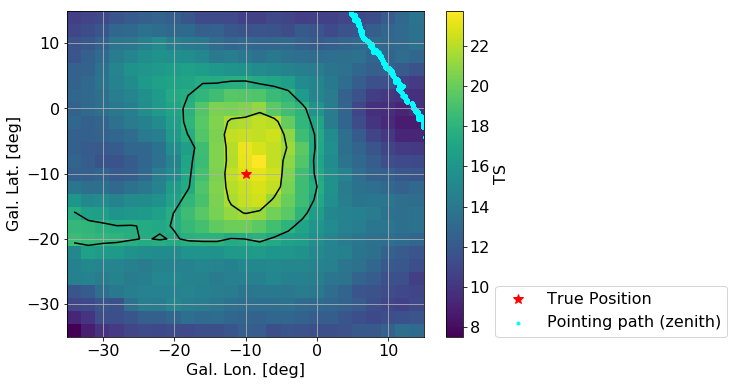

In [112]:
#plt.figure(figsize=(16,10))
#plt.subplot(projection='mollweide')

delta_logL = -2*(result_TS.TS_bg_only-result_TS.TS_vals.reshape(num_b,num_l))

current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='lightgray')

plt.pcolormesh(grid_g[0],grid_g[1],delta_logL)
plt.colorbar(label='TS',orientation='vertical')
plt.contour(l_points,b_points,delta_logL,
            levels=np.nanmax(delta_logL)-np.array([6.2,2.3]),
            colors='black')

plt.plot(l_test,b_test,marker='*',color='red',markersize=10,label='True Position',linestyle='')

plt.scatter(analysis.dataset.l_pointing,
            analysis.dataset.b_pointing,
            color='cyan',label='Pointing path (zenith)',marker='.')

plt.grid()
plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')

plt.xlim(l_points_g.min(),l_points_g.max())
plt.ylim(b_points_g.min(),b_points_g.max())

plt.legend(loc=(1.2,0.0))

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(analysis.dataset.energies.energy_bin_min,analysis.dataset.times.times_min)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx, dy = np.meshgrid(analysis.dataset.energies.energy_bin_wid*2,analysis.dataset.times.times_wid*2)
dx = dx.flatten()
dy = dy.flatten()
dz = analysis.dataset.energies.energy_spec_data.flatten()

cmap = plt.cm.get_cmap('viridis') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='max')

ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Time [s]')
ax.set_zlabel('Count rate [cnts/s/keV]')

ax.view_init(30,315)

#ax.view_init(90,90)


In [ ]:
xpos.shape,ypos.shape,zpos.shape,dx.shape,dy.shape,dz.shape